In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
data=pd.read_csv(r"C:\Users\Home\Downloads\churn_dataset.csv",skipinitialspace=True)

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Checking Duplicates

In [6]:
data[data.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [7]:
data.duplicated().sum() # there is no duplicate data in the data set

0

# Checking the missing values

In [8]:
data.TotalCharges.isna().sum() # total charges column as 11 nan values

11

In [9]:
data.TotalCharges[data.TotalCharges.isna()]

488    NaN
753    NaN
936    NaN
1082   NaN
1340   NaN
3331   NaN
3826   NaN
4380   NaN
5218   NaN
6670   NaN
6754   NaN
Name: TotalCharges, dtype: float64

In [10]:
data.TotalCharges.mean()
data.TotalCharges.median()
data.TotalCharges.mode()[0]

2283.3004408418656

1397.475

20.2

In [11]:
x=data.TotalCharges.median()
data.TotalCharges.fillna(x,inplace=True) 
# replacing the nan with median because mean will be affected by the outliers

In [12]:
data.TotalCharges[data.TotalCharges.isna()].sum()

0.0

In [13]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# outliers

In [15]:
 Q1,Q2,Q3=tuple(data.tenure.quantile(q=[0.25,0.50,0.75]).values)
print( Q1,Q2,Q3)

9.0 29.0 55.0


In [16]:
IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1-1.5*IQR

print(IQR, UL, LL)

46.0 124.0 -60.0


In [17]:
data[(data.tenure<LL)|(data.tenure>UL)].values# there is no outlier in the tenure column

array([], shape=(0, 21), dtype=object)

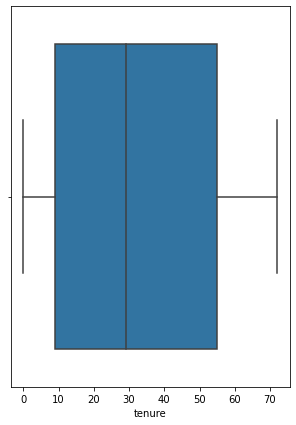

In [18]:
plt.figure(figsize=(5,7))
sns.boxplot(data.tenure);

In [19]:
 Q1,Q2,Q3=tuple(data.MonthlyCharges.quantile(q=[0.25,0.50,0.75]).values)
print( Q1,Q2,Q3)

35.5 70.35 89.85


In [20]:
IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1-1.5*IQR

print(IQR, UL, LL)

54.349999999999994 171.375 -46.02499999999999


In [21]:
data[(data.MonthlyCharges<LL)|(data.MonthlyCharges>UL)].values # there is no outliers in the monthly charges

array([], shape=(0, 21), dtype=object)

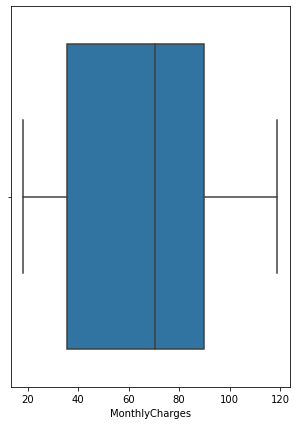

In [22]:
plt.figure(figsize=(5,7))
sns.boxplot(data.MonthlyCharges);

In [23]:
Q1,Q2,Q3=tuple(data.TotalCharges.quantile(q=[0.25,0.50,0.75]).values)
print( Q1,Q2,Q3)

402.225 1397.475 3786.6


In [24]:
IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1-1.5*IQR

print(IQR, UL, LL)

3384.375 8863.1625 -4674.3375


In [25]:
data[(data.TotalCharges<LL)|(data.TotalCharges>UL)].values # there is no outliers in the total charges column

array([], shape=(0, 21), dtype=object)

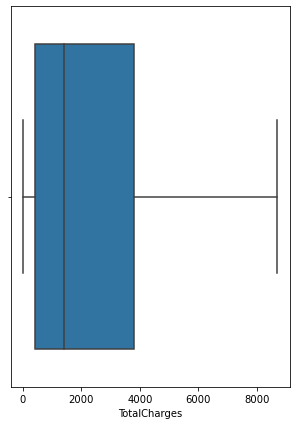

In [26]:
plt.figure(figsize=(5,7))
sns.boxplot(data.TotalCharges);

In [27]:
 Q1,Q2,Q3=tuple(data.SeniorCitizen.quantile(q=[0.25,0.50,0.75]).values)
print( Q1,Q2,Q3)

0.0 0.0 0.0


In [28]:
IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1-1.5*IQR

print(IQR, UL, LL)

0.0 0.0 0.0


In [29]:
data[(data.SeniorCitizen<LL)|(data.SeniorCitizen>UL)]
""" the senior citizen column is not a outlier .
in seniorcitizon column there are only two values 0 and 1 computer takes 1 as the outlier"""

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
30,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No
34,3413-BMNZE,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No
50,8012-SOUDQ,Female,1,No,No,43,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,No
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,...,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.10,No
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes


' the senior citizen column is not a outlier .\nin seniorcitizon column there are only two values 0 and 1 computer takes 1 as the outlier'

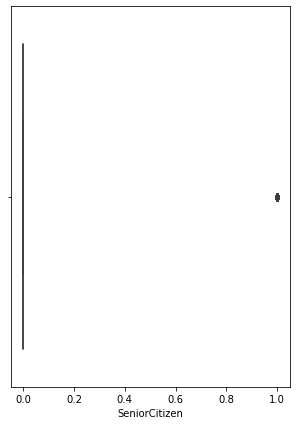

In [30]:
plt.figure(figsize=(5,7))
sns.boxplot(data.SeniorCitizen);

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [32]:
X=data[["gender","SeniorCitizen","Partner","Dependents","tenure","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod","MonthlyCharges","TotalCharges"]]
y=data["Churn"]

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [34]:
X_train_num=X_train.select_dtypes(include=["int64","float64"])
X_train_cat=X_train.select_dtypes(include=["object"])

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_ntran=pd.DataFrame(scaler.fit_transform(X_train_num),columns=X_train_num.columns,index=X_train_num.index)

In [36]:
X_train_cat

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
5925,Male,No,No,Yes,Yes,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Electronic check
4395,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
1579,Male,Yes,No,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check
1040,Male,No,No,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Credit card (automatic)
1074,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,Male,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
5192,Male,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
3980,Male,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
235,Male,No,No,Yes,Yes,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check


In [41]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop="first",sparse=False)
X_train_ctran=pd.DataFrame(encoder.fit_transform(X_train_cat),columns=encoder.get_feature_names_out(X_train_cat.columns),
                           index=X_train_cat.index)

In [42]:
X_train_trans=pd.concat([X_train_ntran,X_train_ctran],axis=1)

In [45]:
X_train_trans

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5925,-0.43979,-0.497482,0.129755,-0.379352,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4395,-0.43979,1.498180,1.299897,2.278741,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1579,2.27381,-0.823305,0.519802,-0.584746,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1040,2.27381,-0.741849,0.851757,-0.445510,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1074,-0.43979,-1.271311,-1.450350,-0.994256,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,2.27381,-0.945488,1.185372,-0.598674,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5192,-0.43979,1.131630,-1.488525,-0.479096,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3980,-0.43979,-0.171660,1.357989,0.309689,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
235,-0.43979,-1.230583,-0.344940,-0.953266,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## X_test

In [46]:
X_test_num=X_test.select_dtypes(include=["int64","float64"])
X_test_cat=X_test.select_dtypes(include=["object"])

In [47]:
X_test_ntran=pd.DataFrame(scaler.transform(X_test_num),columns=X_test_num.columns,index=X_test_num.index)

In [48]:
X_test_ctran=pd.DataFrame(encoder.transform(X_test_cat),columns=encoder.get_feature_names_out(X_test_cat.columns),
                          index=X_test_cat.index)

In [54]:
X_test_trans=pd.concat([X_test_ntran,X_test_ctran],axis=1)

## Logistic regrression

In [84]:
from sklearn.linear_model import LogisticRegression
linear=LogisticRegression()
linear.fit(X_train_trans,y_train)

LogisticRegression()

In [85]:
y_test_pred=linear.predict(X_test_trans)

In [86]:
from sklearn import metrics
linear_acc=metrics.accuracy_score(y_test,y_test_pred)
linear_acc

0.8097491717936584

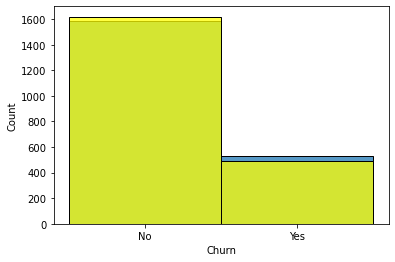

In [87]:
sns.histplot(y_test)
sns.histplot(y_test_pred,color="yellow");

## KNN

In [88]:
from sklearn.neighbors import KNeighborsClassifier
neighbour=KNeighborsClassifier()
neighbour.fit(X_train_trans,y_train)

KNeighborsClassifier()

In [89]:
y_test_pred=neighbour.predict(X_test_trans)

In [90]:
neighbour_acc=metrics.accuracy_score(y_test,y_test_pred)
neighbour_acc

0.7799337434926644

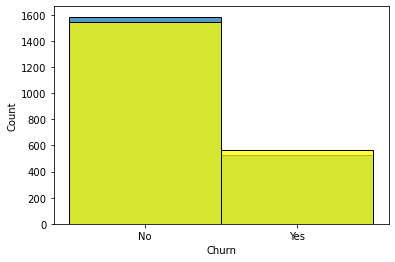

In [91]:
sns.histplot(y_test)
sns.histplot(y_test_pred,color="yellow");

## Decision tree

In [92]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(X_train_trans,y_train)

DecisionTreeClassifier()

In [93]:
y_test_pred=tree.predict(X_test_trans)

In [94]:
tree_Acc=metrics.accuracy_score(y_test,y_test_pred)
tree_Acc

0.7420728821580691

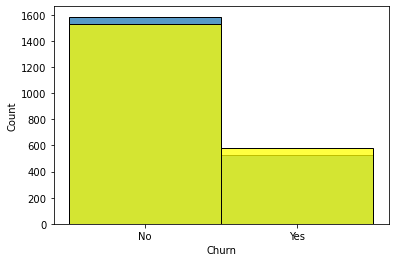

In [95]:
sns.histplot(y_test)
sns.histplot(y_test_pred,color="yellow");

## Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier
ensemble=RandomForestClassifier()
ensemble.fit(X_train_trans,y_train)

RandomForestClassifier()

In [97]:
y_test_pred=ensemble.predict(X_test_trans)

In [98]:
ensemble_acc=metrics.accuracy_score(y_test,y_test_pred)
ensemble_acc

0.7969711310932324

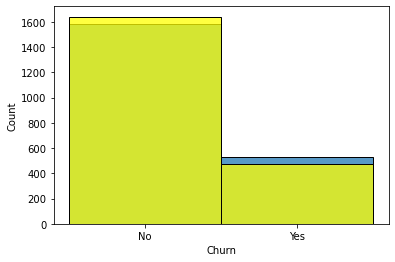

In [99]:
sns.histplot(y_test)
sns.histplot(y_test_pred,color="yellow");

## Support vector machines

In [100]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train_trans,y_train)

SVC()

In [101]:
y_test_pred=svm.predict(X_test_trans)

In [102]:
svm_acc=metrics.accuracy_score(y_test,y_test_pred)
svm_acc

0.804070042593469

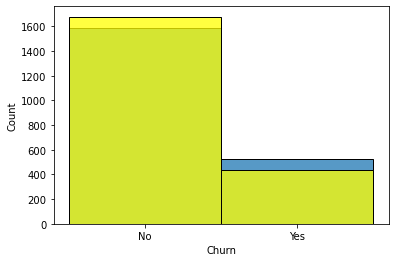

In [103]:
sns.histplot(y_test)
sns.histplot(y_test_pred,color="yellow");

In [77]:
data_df=pd.DataFrame({"Algorithms":["Logisticregression","KNN","Decisontree","Randomforest","Supportvectormachine"],
                     "Accuracy_score":[linear_acc,neighbour_acc,tree_Acc,ensemble_acc,svm_acc]})

In [78]:
data_df

,Algorithms,Accuracy_score
0,Logisticregression,0.779934
1,KNN,0.779934
2,Decisontree,0.744439
3,Randomforest,0.800284
4,Supportvectormachine,0.804070
